In [1]:
import numpy as np
import seaborn as sns
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import squarify 
import collections
import operator

In [2]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="white", context="talk")

In [3]:
moods = pd.read_csv('ab-2017-01-24-highlevel-moods.csv')

In [4]:
mood_acoustic = moods['value_mood_acoustic']
ac_counts = pd.Series.value_counts(mood_acoustic)

In [5]:
mood_aggressive = moods['value_mood_aggressive']
ag_counts = pd.Series.value_counts(mood_aggressive)

In [6]:
mood_electronic = moods['value_mood_electronic']
el_counts = pd.Series.value_counts(mood_electronic)

In [7]:
mood_happy = moods['value_mood_happy']
ha_counts = pd.Series.value_counts(mood_happy)

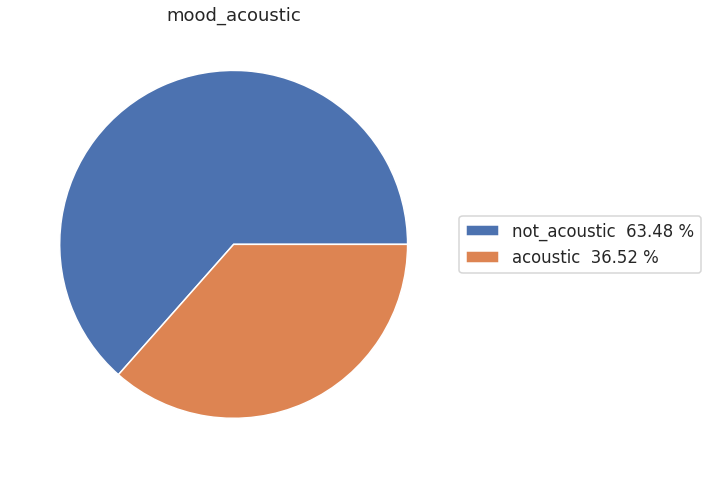

In [8]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(ac_counts)
pct = 100*ac_counts/len(mood_acoustic)

ax.legend(labels=['%s  %1.2f %%' % (l, s) for l, s in zip(list(pct.keys()), list(pct))], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('mood_acoustic')
plt.show()

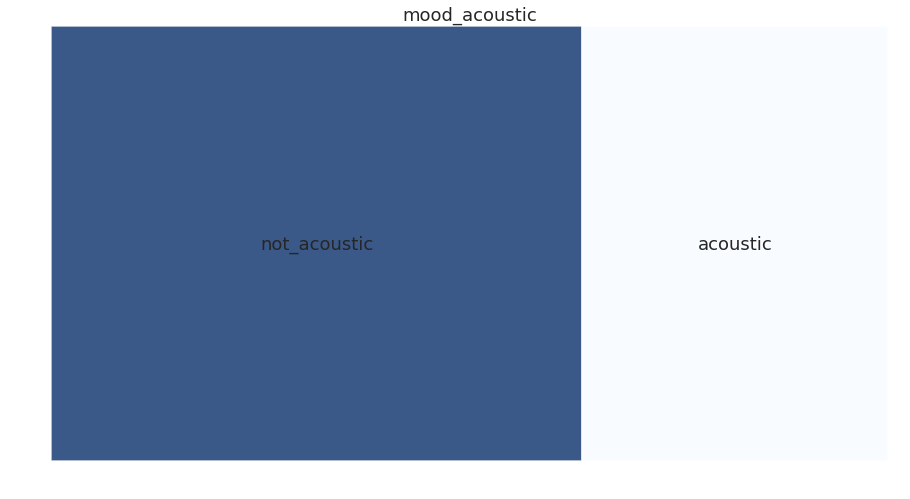

In [9]:
# Creating colorscheme
cmap = cm.Blues
mini=min(np.array(ac_counts))
maxi=max(np.array(ac_counts))
norm = clr.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in np.array(ac_counts)]

x = np.array(ac_counts)
y = np.array(ac_counts.keys())

squarify.plot(sizes=x, label=y, alpha=.8, color=colors)
plt.axis('off')
plt.title('mood_acoustic')
plt.show() 

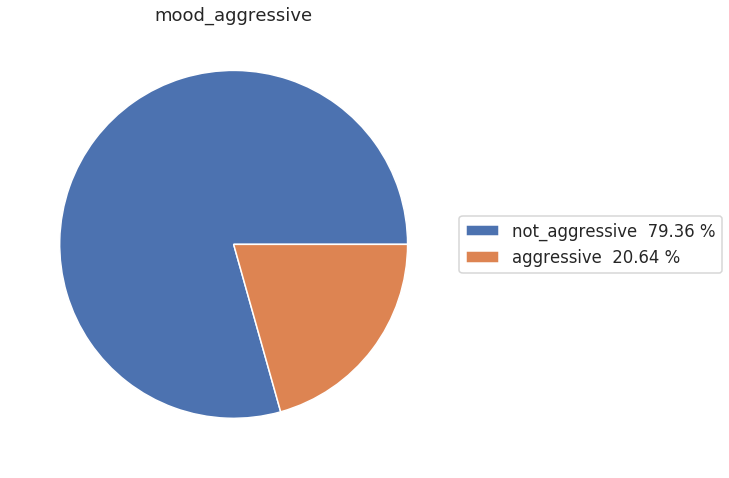

In [10]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(ag_counts)
pct = 100*ag_counts/len(mood_aggressive)

ax.legend(labels=['%s  %1.2f %%' % (l, s) for l, s in zip(list(pct.keys()), list(pct))], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('mood_aggressive')
plt.show()

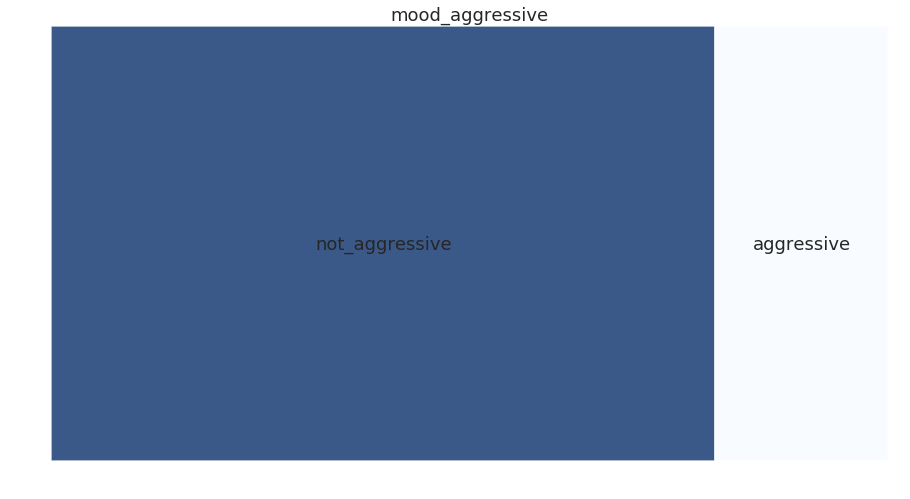

In [11]:
# Creating colorscheme
cmap = cm.Blues
mini=min(np.array(ag_counts))
maxi=max(np.array(ag_counts))
norm = clr.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in np.array(ag_counts)]

x = np.array(ag_counts)
y = np.array(ag_counts.keys())

squarify.plot(sizes=x, label=y, alpha=.8, color=colors)
plt.axis('off')
plt.title('mood_aggressive')
plt.show() 

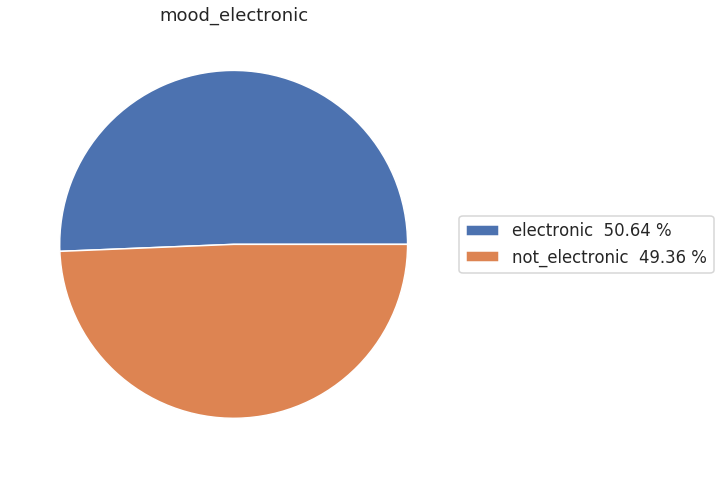

In [12]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(el_counts)
pct = 100*el_counts/len(mood_electronic)

ax.legend(labels=['%s  %1.2f %%' % (l, s) for l, s in zip(list(pct.keys()), list(pct))], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('mood_electronic')
plt.show()

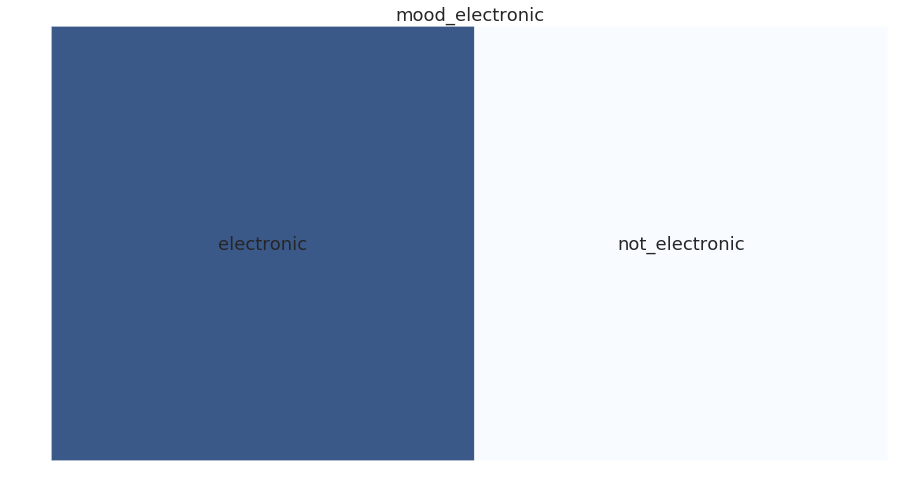

In [13]:
# Creating colorscheme
cmap = cm.Blues
mini=min(np.array(el_counts))
maxi=max(np.array(el_counts))
norm = clr.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in np.array(el_counts)]

x = np.array(el_counts)
y = np.array(el_counts.keys())

squarify.plot(sizes=x, label=y, alpha=.8, color=colors)
plt.axis('off')
plt.title('mood_electronic')
plt.show() 

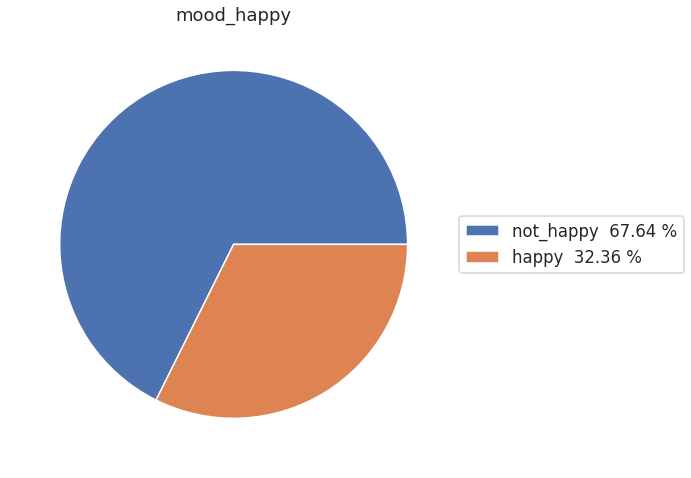

In [14]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(ha_counts)
pct = 100*ha_counts/len(mood_happy)

ax.legend(labels=['%s  %1.2f %%' % (l, s) for l, s in zip(list(pct.keys()), list(pct))], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('mood_happy')
plt.show()

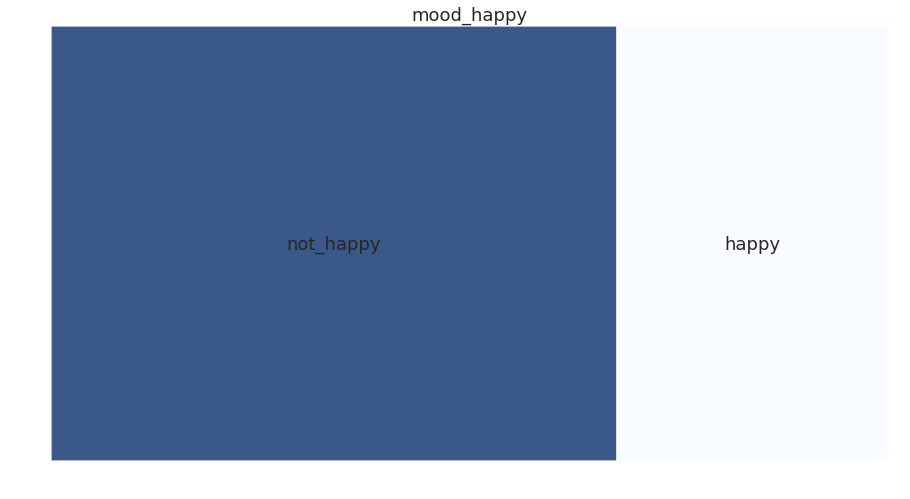

In [15]:
# Creating colorscheme
cmap = cm.Blues
mini=min(np.array(ha_counts))
maxi=max(np.array(ha_counts))
norm = clr.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in np.array(ha_counts)]

x = np.array(ha_counts)
y = np.array(ha_counts.keys())

squarify.plot(sizes=x, label=y, alpha=.8, color=colors)
plt.axis('off')
plt.title('mood_happy')
plt.show() 

In [16]:
genres = pd.read_csv('ab-2017-01-23-highlevel-genres.csv')

In [17]:
# d = collections.defaultdict(list)
mood_genre = collections.defaultdict(list)

genre_rosamerica = genres['genre_rosamerica']
g_mbids = genres['mbid']
g_dict = dict(zip(g_mbids, genre_rosamerica))

mood_acoustic = moods['value_mood_acoustic']
m_mbids = moods['mbid']
m_dict = dict(zip(m_mbids, mood_acoustic))

for mbid in g_dict:
    
    if mbid in m_dict: 
        # d[mbid].append(g_dict[mbid])
        # d[mbid].append(m_dict[mbid])
        mood_genre[m_dict[mbid]].append(g_dict[mbid]) 

In [18]:
ac_genre_counts = pd.Series.value_counts(mood_genre['acoustic'])
nac_genre_counts = pd.Series.value_counts(mood_genre['not_acoustic'])

mood = ['acoustic'] * len(ac_genre_counts) + ['not_acoustic'] * len(nac_genre_counts)
genre_counts = ac_genre_counts.sort_index().append(nac_genre_counts.sort_index())

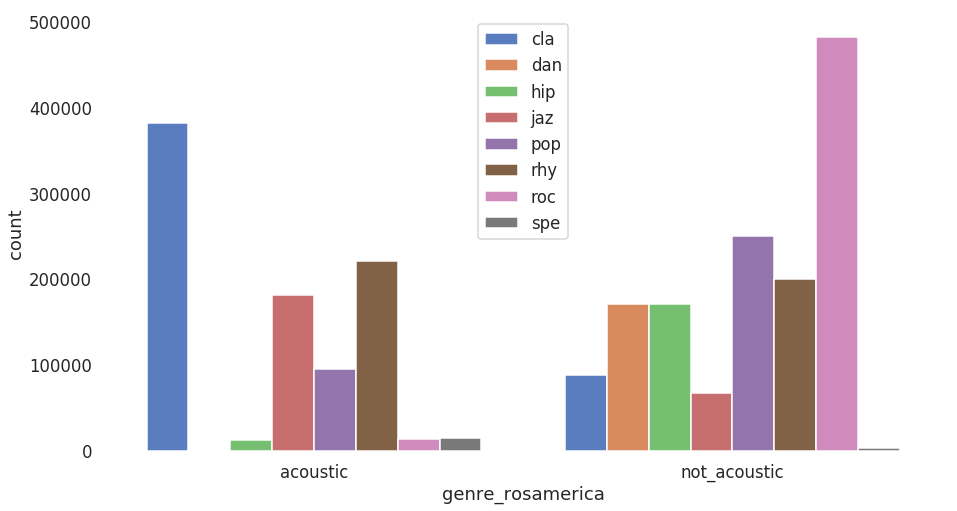

In [27]:
ax = sns.barplot(x=mood, y=genre_counts, hue=genre_counts.keys(), palette='muted')
ax.set_xlabel('genre_rosamerica')
ax.set_ylabel('count')
sns.despine(left=True, bottom=True)

In [20]:
pct = 100 * ac_genre_counts /(ac_genre_counts + nac_genre_counts)
pct = pct.append(100 - pct)

genre_counts

cla    381477
dan       859
hip     12196
jaz    181158
pop     95066
rhy    220786
roc     13255
spe     14479
cla     88538
dan    170787
hip    171006
jaz     67312
pop    250684
rhy    199910
roc    482415
spe      2786
dtype: int64

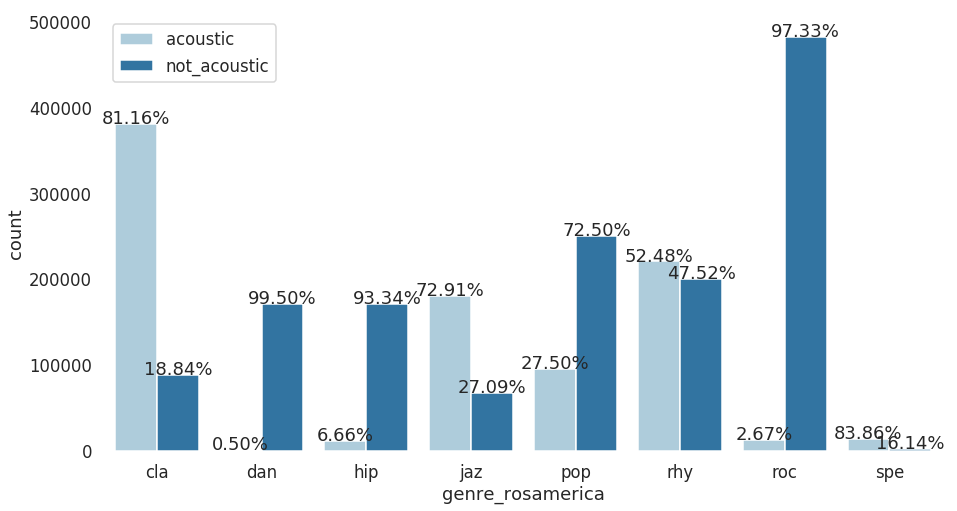

In [24]:
ax = sns.barplot(x=genre_counts.keys(), y=genre_counts, hue=mood, palette='Paired')

i = 0
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height() + 10., '{:1.2f}'.format(pct[i]) + '%', ha='center') 
    i += 1
    
ax.set_xlabel('genre_rosamerica')
ax.set_ylabel('count')
sns.despine(left=True, bottom=True)